In [35]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [67]:
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log_Window_reduced.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log_Window_reduced.csv")
data_1.drop_duplicates(inplace=True)
data_2.drop_duplicates(inplace=True)

In [68]:
stacked_df = pd.concat([data_1,data_2])

In [69]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10536 entries, 0 to 5612
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trial_ID                    10536 non-null  object 
 1   Collider_Name               10536 non-null  object 
 2   Occurrence_Order            10536 non-null  int64  
 3   Overall_Transition_Entropy  10536 non-null  float64
 4   Participant_ID              10536 non-null  int64  
 5   Session                     10536 non-null  int64  
 6   Agent_ID                    10536 non-null  int64  
 7   Agent_Type                  10536 non-null  object 
 8   Experiment                  10536 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 823.1+ KB


In [28]:
data_2.head()

Trial_ID Collider_Name  Occurrence_Order  Gaze_Sequence_Length  \
0  01_Cma_Trial_22        01_Cma                22                   217   
1  03_Cma_Trial_16        03_Cma                16                   215   
2  09_Cma_Trial_14        09_Cma                14                   174   
3  09_Cma_Trial_24        09_Cma                24                   190   
4  09_Cma_Trial_26        09_Cma                26                   208   

   Overall_Transition_Entropy  Transition_Entropy_Task_Building  \
0                    0.714568                          0.815209   
1                    0.370755                          0.270183   
2                    0.491763                          0.817425   
3                    0.400907                          0.739799   
4                    0.436394                          0.559361   

   Stationary_Entropy_Task_Building  Transition_Entropy_Background  \
0                          0.241199                       0.624054   
1                          0.228366                       0.384230   
2                          0.202039                       0.386165   
3                          0.139142                       0.334623   
4                          0.077987                       0.394688   

   Stationary_Entropy_Background  Transition_Entropy_Building  \
0                       0.256251                     0.773949   
1                       0.194318                     0.360964   
2                       0.244434                     0.556521   
3                       0.133474                     0.573008   
4                       0.138031                     0.562974   

   Stationary_Entropy_Building  Transition_Entropy_Agent  \
0                     0.233892                  0.789708   
1                     0.103260                  0.485475   
2                     0.238562                  0.440645   
3                     0.162825                  0.000000   
4                     0.192595                  0.395488   

   Stationary_Entropy_Agent  Transition_Entropy_Global_Landmark  \
0                  0.170833                                 NaN   
1                  0.159792                                 NaN   
2                  0.180315                                 NaN   
3                  0.029907                            0.395488   
4                  0.037978                            0.590436   

   Stationary_Entropy_Global_Landmark  Participant_ID  Session  Agent_ID  \
0                                 NaN            1031        1         1   
1                                 NaN            1031        1         3   
2                                 NaN            1031        1         9   
3                            0.040861            1031        1         9   
4                            0.056024            1031        1         9   

  Agent_Type  Experiment  
0     Active           2  
1     Active           2  
2     Active           2  
3     Active           2  
4     Active           2

In [70]:
# Sort the data
stacked_df_ordered = stacked_df.sort_values(by=["Participant_ID", "Session", "Occurrence_Order"])

# Create Encounter_Order
stacked_df_ordered["Encounter_Order"] = (
    stacked_df_ordered.groupby(["Participant_ID", "Session", "Agent_ID"])
    .cumcount() + 1
)


In [58]:
stacked_df_ordered.Experiment.value_counts()

Experiment
2    5613
1    4923
Name: count, dtype: int64

In [72]:
# Filter out values less than 0.001
filtered_df = stacked_df_ordered[(stacked_df_ordered['Overall_Transition_Entropy'] >= 0.001)]

# Group by Agent_ID, Participant_ID, and Session
grouped_by_session = stacked_df_ordered.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Session', 'Experiment']
)['Overall_Transition_Entropy'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Group by Agent_ID and Participant_ID (not separated by Session)
grouped_without_session = stacked_df_ordered.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Experiment']
)['Overall_Transition_Entropy'].agg(['min', 'max', 'median', 'mean']).reset_index()

grouped_for_LMM = stacked_df_ordered.groupby(
    ['Agent_ID', 'Agent_Type', 'Participant_ID', 'Experiment']
)['Overall_Transition_Entropy'].agg(['min', 'max', 'median', 'mean']).reset_index()


In [73]:
grouped_for_LMM.Experiment.value_counts()

Experiment
2    1546
1    1505
Name: count, dtype: int64

In [74]:
grouped_for_LMM.head()
grouped_for_LMM.to_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/grouped_for_LMM.csv")

In [11]:
Chao = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/grouped_for_LMM_Chao_Shen.csv")

In [12]:
Chao.head()

Unnamed: 0  Agent_ID Agent_Type  Participant_ID  Experiment       min  \
0           0         1     Active             365           1  2.285714   
1           1         1     Active             479           1  1.066667   
2           2         1     Active            1031           2  1.294249   
3           3         1     Active            1142           2  0.636430   
4           4         1     Active            1234           2  0.896440   

        max    median      mean  
0  2.628756  2.457235  2.457235  
1  3.549732  1.639768  1.880813  
2  2.423025  1.696149  1.707393  
3  2.628756  1.274585  1.415056  
4  2.285714  2.053292  1.822185

In [13]:
grouped_for_LMM.head()

Agent_ID Agent_Type  Participant_ID  Experiment      min       max  \
0         1     Active             365           1  0.00000  1.142857   
1         1     Active             479           1  0.46883  1.774866   
2         1     Active            1031           2  0.00000  1.043540   
3         1     Active            1142           2  0.00000  1.314378   
4         1     Active            1234           2  0.44822  0.984404   

     median      mean  
0  1.132144  0.758334  
1  0.758233  0.875208  
2  0.773554  0.683418  
3  0.626192  0.603141  
4  0.884305  0.800308

<Axes: xlabel='Agent_ID', ylabel='mean'>

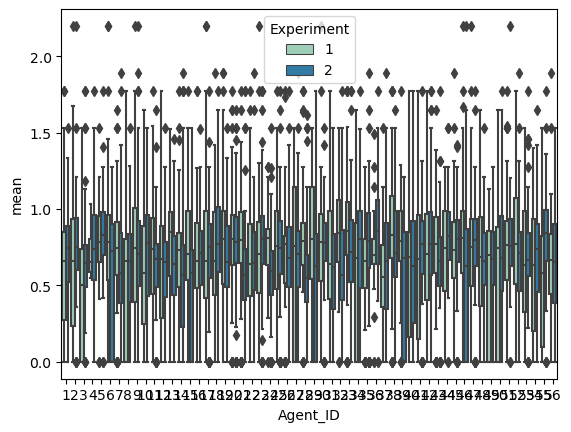

In [14]:
# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)
sns.boxplot(data=grouped_by_session, x='Agent_ID', y='mean', hue='Experiment', palette=experiment_palette)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_18072/4235266660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_by_session_Active["Experiment_Type"] = grouped_by_session_Active["Experiment"].apply(lambda x: "Congruent" if x == 1 else "Incongruent")


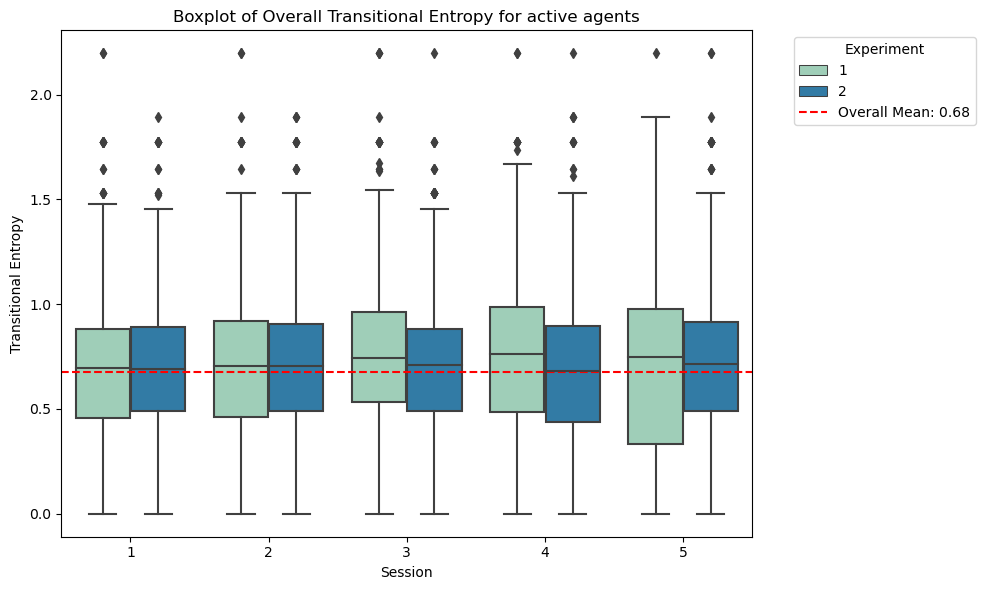

In [15]:


# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)
grouped_by_session_Active = grouped_by_session[grouped_by_session.Agent_Type == "Active"]
# Add a new column for Experiment_Type
grouped_by_session_Active["Experiment_Type"] = grouped_by_session_Active["Experiment"].apply(lambda x: "Congruent" if x == 1 else "Incongruent")


# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = grouped_by_session_Active['mean'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_by_session, x='Session', y='mean', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Overall Transitional Entropy for active agents")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Experiment", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

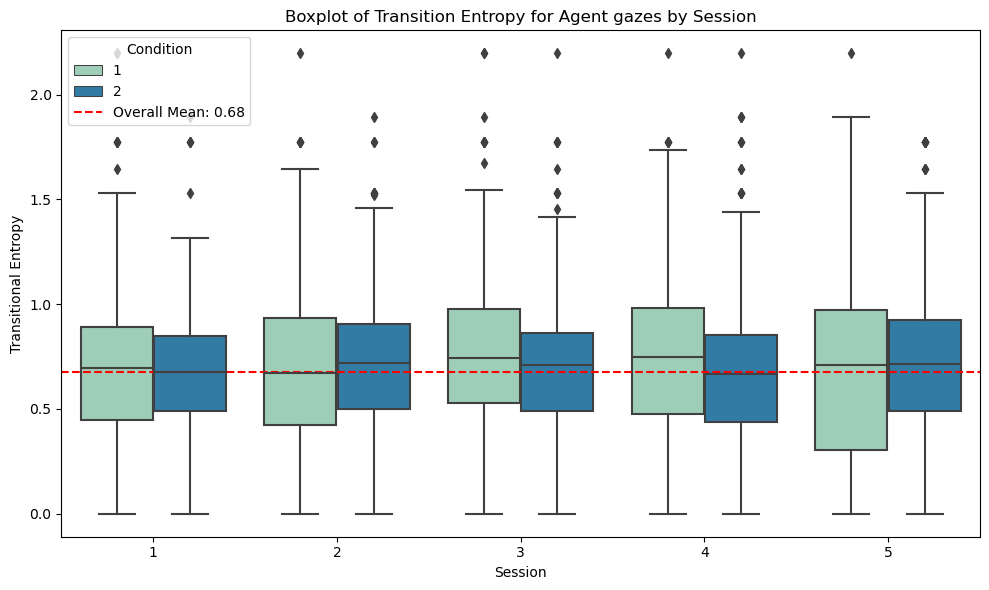

In [16]:
grouped_by_session_active = grouped_by_session[grouped_by_session.Agent_Type == "Active"]

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = grouped_by_session_active['mean'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_by_session_active, x='Session', y='mean', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()